In [1]:
%pip install -U keras-vision
# %pip install git+https://github.com/veb-101/keras-vision.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [2]:
import os

os.environ["KERAS_BACKEND"] = "jax"
# os.environ["KERAS_BACKEND"] = "tensorflow"
# os.environ["KERAS_BACKEND"] = "torch"

import cv2
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras_vision.MobileViT_v1 import build_MobileViT_v1


def test_prediction(*, image_path, model=None, image_shape=(224, 224), show=True):
    # Load and process the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR) # NOT CONVERTED to RGB (required).

    img = cv2.resize(img, image_shape)

    if show:
        plt.imshow(img[:, :, ::-1])

    img = img  / 255. # Normalize pixel values to [0, 1]
    img = img.astype("float32")  # Ensure the correct type for TensorFlow
    # Add the batch dimension
    img = np.expand_dims(img, 0)  # Shape becomes (1, 256, 256, 3)

    # Perform prediction
    preds = model.predict(img, verbose=0)

    # Output prediction
    print(f"Model: {model.name}, Predictions: {preds.argmax()}")

In [3]:
from keras_vision.MobileViT_v1 import build_MobileViT_v1

In [4]:
# build_MobileViT_v1(model_type="XXS", pretrained=True, include_top=False).summary()
# build_MobileViT_v1(model_type="XXS", pretrained=False, include_top=True, num_classes=1).summary()
# build_MobileViT_v1(model_type="XXS", pretrained=False, include_top=False).summary()
model_xxs = build_MobileViT_v1(model_type="XXS", input_shape=(224, 224, 3), pretrained=True)
model_xxs.summary()

5742728/5742728 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileViT_v1-XXS"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-1-Conv (ConvLayer)             │ (None, 112, 112, 16)        │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-1-IR2 (InvertedResidualBlock)  │ (None, 112, 112, 16)        │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR1 (InvertedResidualBlock)  │ (None, 56, 56, 24)          │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR2 (InvertedResidualBlock)  │ (None, 56, 56, 24)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR3 (InvertedResidualBlock)  │ (None, 56, 56, 24)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-3-IR1 (InvertedResidualBlock)  │ (None, 28, 28, 48)          │           4,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-1                     │ (None, 28, 28, 48)          │         136,000 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-4-IR1 (InvertedResidualBlock)  │ (None, 14, 14, 64)          │          12,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-2                     │ (None, 14, 14, 64)          │         330,080 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-5-IR1 (InvertedResidualBlock)  │ (None, 7, 7, 80)            │          20,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-3                     │ (None, 7, 7, 80)            │         413,664 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_conv (ConvLayer)               │ (None, 7, 7, 320)           │          26,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 320)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1000)                │         321,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,276,136 (4.87 MB)

 Trainable params: 1,272,024 (4.85 MB)

 Non-trainable params: 4,112 (16.06 KB)

1. `model_type` can be `XS` or `S` as well.
   
2. `input_shape` can be `(None, None, 3)`

3. `pretrained` can be `True` or `False`
   
4. `include_top` can be `True` or `False`
   
5. `num_classes` can be an `int` or `None`

In [5]:
!wget -qnc https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg/1024px-Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg -O cat.jpg
!wget -qnc https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/1920px-Grosser_Panda.JPG -O pandas.jpg

[IMAGENET 1000 Class List](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/)

Model: MobileViT_v1-XXS, Predictions: 282


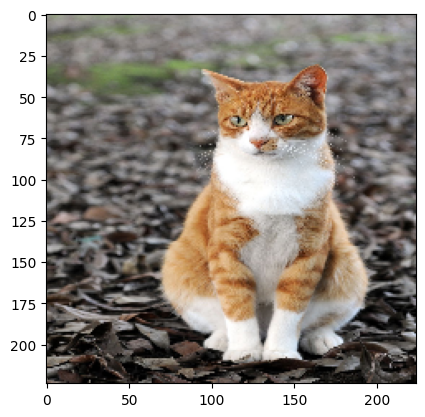

In [6]:
test_prediction(image_path=r"cat.jpg", model=model_xxs)

Model: MobileViT_v1-XXS, Predictions: 388


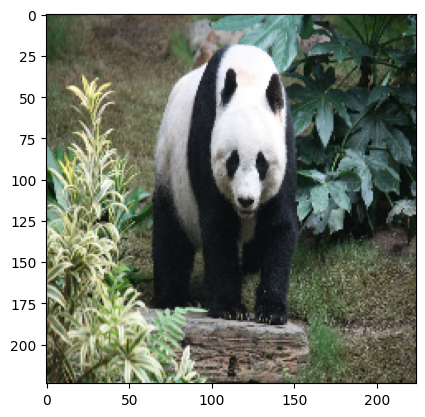

In [7]:
test_prediction(image_path=r"pandas.jpg", model=model_xxs)

In [11]:
model_xxs_feature_extractor = build_MobileViT_v1(model_type="XXS", input_shape=(None, None, 3), include_top=False, pretrained=True)
model_xxs_feature_extractor.summary()

Model: "MobileViT_v1-XXS"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-1-Conv (ConvLayer)             │ (None, None, None, 16)      │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-1-IR2 (InvertedResidualBlock)  │ (None, None, None, 16)      │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR1 (InvertedResidualBlock)  │ (None, None, None, 24)      │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR2 (InvertedResidualBlock)  │ (None, None, None, 24)      │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-2-IR3 (InvertedResidualBlock)  │ (None, None, None, 24)      │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-3-IR1 (InvertedResidualBlock)  │ (None, None, None, 48)      │           4,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-1                     │ (None, None, None, 48)      │         136,000 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-4-IR1 (InvertedResidualBlock)  │ (None, None, None, 64)      │          12,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-2                     │ (None, None, None, 64)      │         330,080 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block-5-IR1 (InvertedResidualBlock)  │ (None, None, None, 80)      │          20,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileViTBlock-3                     │ (None, None, None, 80)      │         413,664 │
│ (MobileViT_v1_Block)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_conv (ConvLayer)               │ (None, None, None, 320)     │          26,880 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 955,136 (3.64 MB)

 Trainable params: 951,024 (3.63 MB)

 Non-trainable params: 4,112 (16.06 KB)